In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Overview of Data



In [2]:
df = pd.read_csv('data/epi_r.csv')

In [3]:
print("Checking first 5 rows of data")
df.head()

Checking first 5 rows of data


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"Size of dataframe - {df.shape}")

Size of dataframe - (20052, 680)


In [5]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some observations about the given dataset:


*   There are total 20052 rows and 680 columns,columns coming after 'sodium' are of binary type, they have 0 or 1 as value
*   Except the title column all are of float type columns



# Data Cleaning
For data cleaning we will check the following things and fix those if needed -

*   Null values
*   Outliers
*   Duplicate rows

In [6]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts>0]
print("Null value counts for each column:\n", null_counts)

Null value counts for each column:
 calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64


There are some null values in 4 columns and since these are important columns for our analysis we need to remove the rows where null values are there. Also we have enough data of around 20k observation and hence deleting some rows won't affect the analysis.:

In [7]:
df.dropna(inplace=True)
print(f"Datsize after removing null values - {df.shape}")

Datsize after removing null values - (15864, 680)


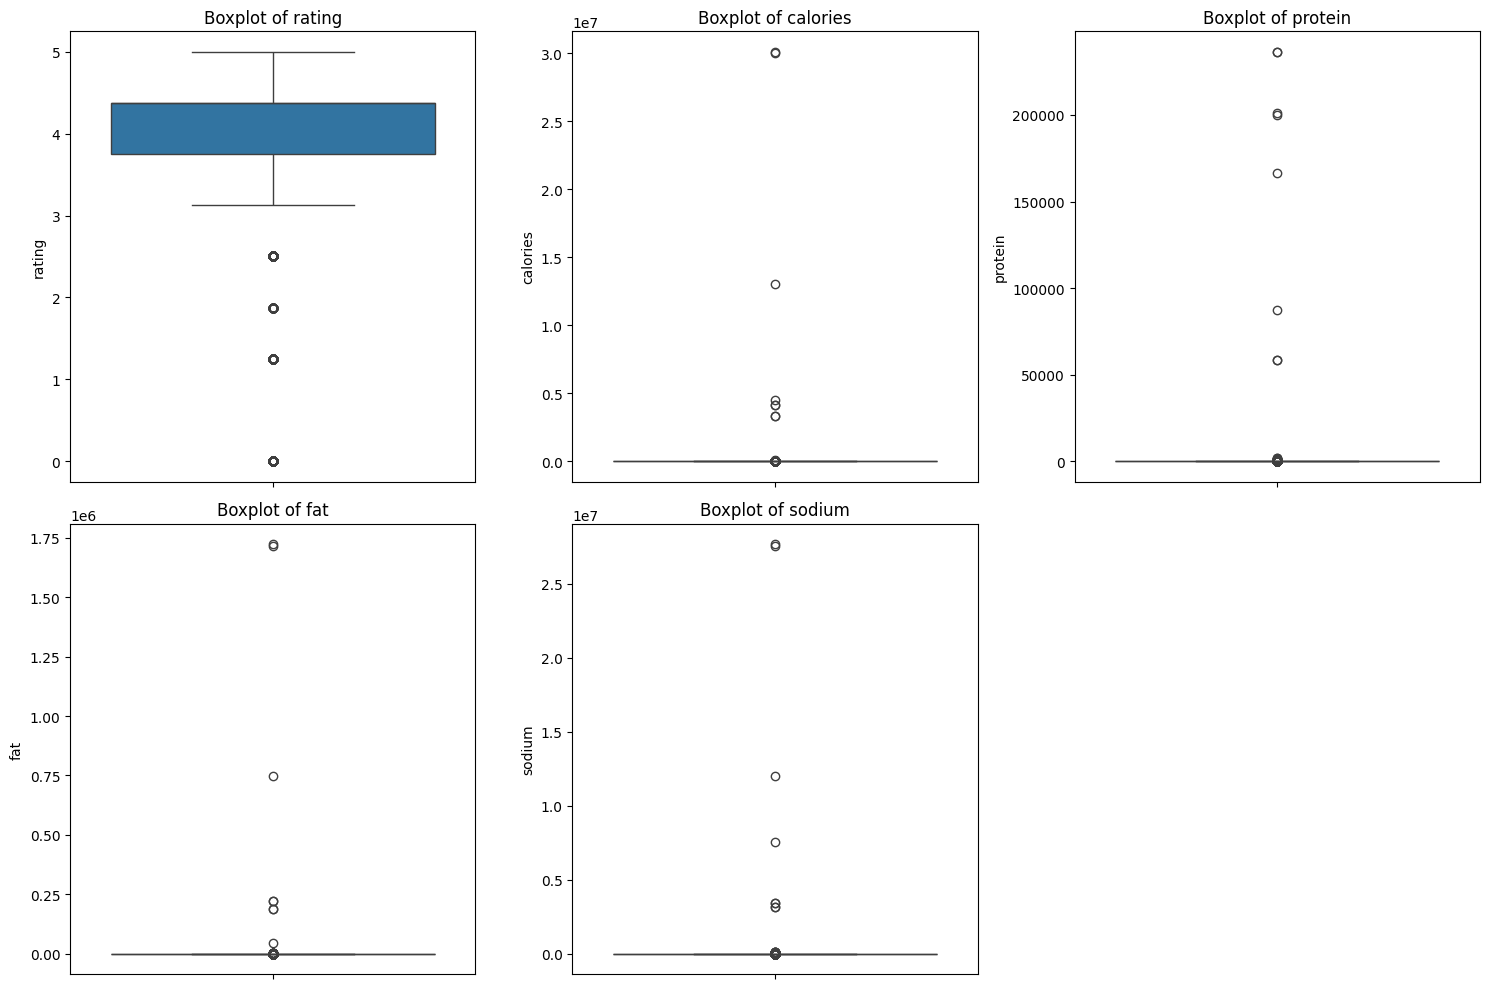

In [8]:
cols_to_check = ['rating', 'calories', 'protein', 'fat', 'sodium']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Above charts shows signs of outliers for calories, protien, fat and sodium columns. Lets replot these after removing outliers.

Dataset size after removing outliers: (12662, 680)


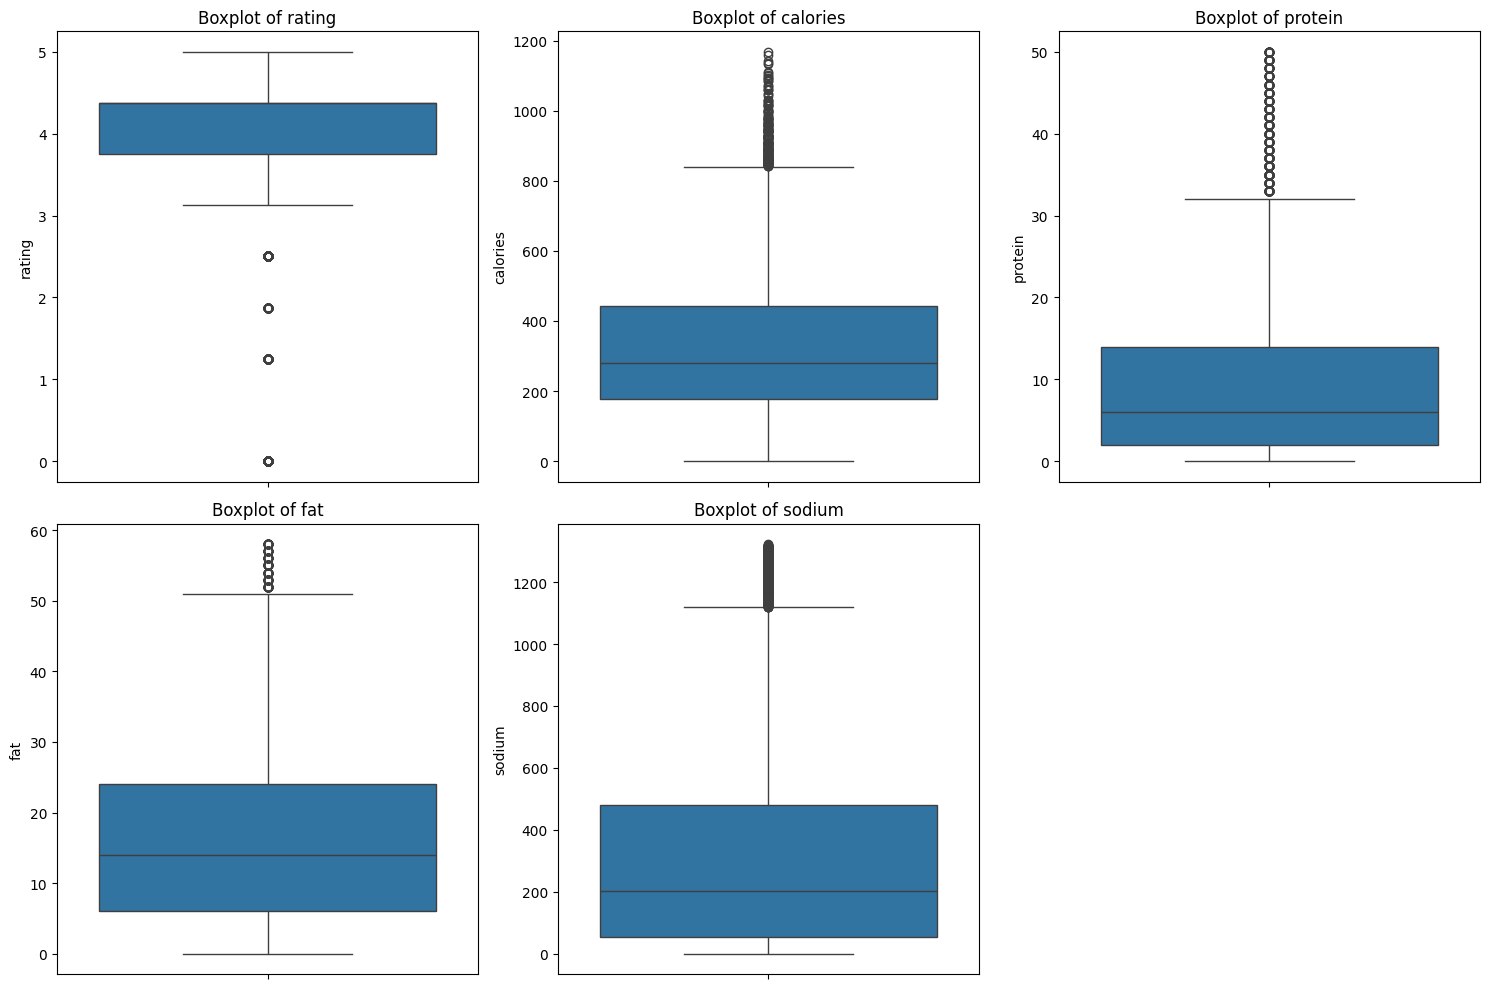

In [9]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

cols_to_remove_outliers = ['calories', 'protein', 'fat', 'sodium']
for col in cols_to_remove_outliers:
  df = remove_outliers_iqr(df, col)

print(f"Dataset size after removing outliers: {df.shape}")

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [10]:
df = df.drop_duplicates()
print(f"Dataset size after removing duplicates: {df.shape}")

Dataset size after removing duplicates: (11453, 680)


# Exploratory Data Analysis


We will check for correlations among the ratings, calories and other nutrients.

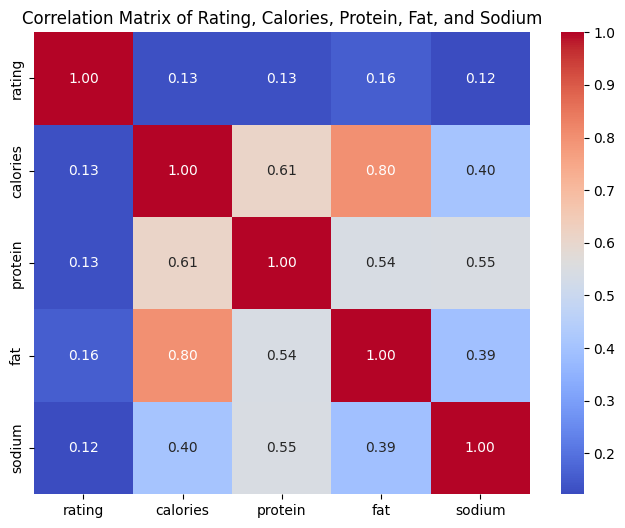

In [11]:
corr_matrix = df[['rating', 'calories', 'protein', 'fat', 'sodium']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rating, Calories, Protein, Fat, and Sodium')
plt.show()


The correlation graph suggests that there is no direct correlation of ratings with any other columns. There is significant correlation of calories with fat and protein.

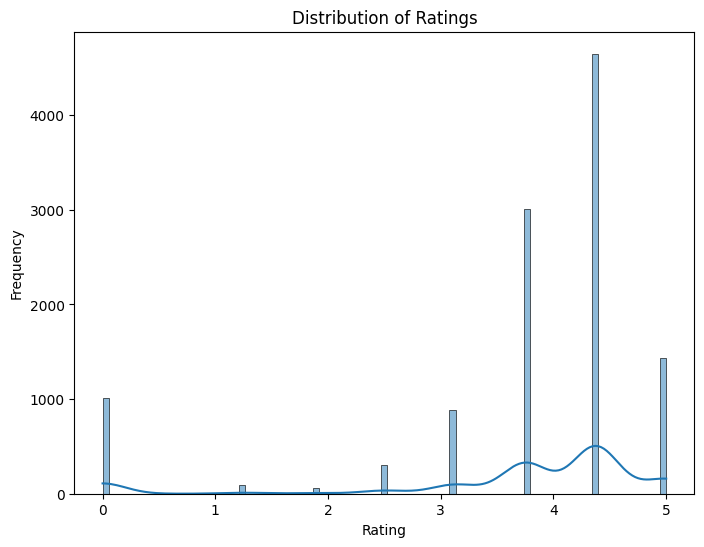

In [12]:
#plot distribution curve for rating

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


We can observe in the chart that the ratings are either very low(nearly 0) or somewhat on higher side ( greater than 3). We see very low number of ratings in range 0.5 - 2.5.


Now we have identified some categories among some dataset columns and we will be looking into how rating varies for each of those columns/categories.

In [13]:
ingredients = ['bread','rice','meat','egg','drink','drinks','alcoholic','vegetable']
timings = ['breakfast','lunch','dinner']
dish_types = ['healthy','fat free','high fiber','low cal','low carb','low cholesterol','low fat','low sodium','low sugar','low/no sugar']

In [14]:
ingdf = pd.DataFrame()
for ingredient in ingredients:
  tmp = df.loc[df[ingredient]>0,['rating']]
  if len(tmp)>50:
    tmp['ing'] = ingredient
    ingdf = pd.concat([ingdf,tmp])

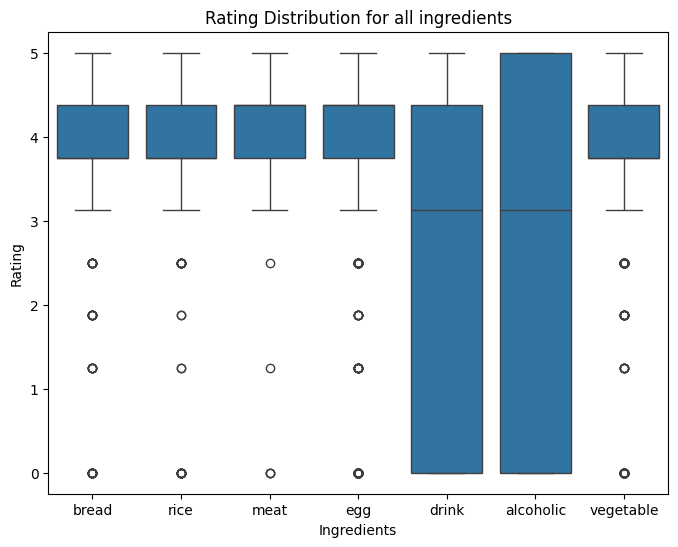

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ing', y='rating', data=ingdf)
plt.title(f'Rating Distribution for all ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Rating')
plt.show()


The distribution suggests that there are very significant number of times alcohol and drinks category got very low ratings as compared to others.

In [16]:
meals = pd.DataFrame()
for timing in timings:
  tmp = df.loc[df[timing]>0,['rating']]
  if len(tmp)>50:
    tmp['meal'] = timing
    meals = pd.concat([meals,tmp])

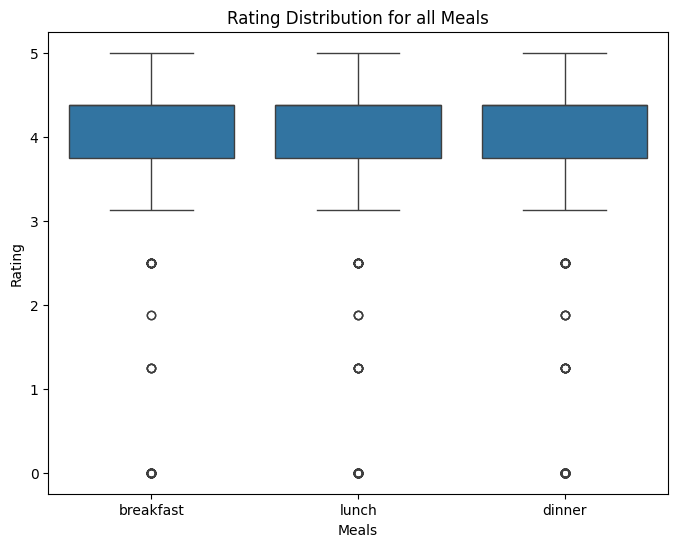

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='meal', y='rating', data=meals)
plt.title(f'Rating Distribution for all Meals')
plt.xlabel('Meals')
plt.ylabel('Rating')
plt.show()


This suggests there is not any pattern for ratings for different meal times.

In [18]:
dishtypes = pd.DataFrame()
for dish_type in dish_types:
  tmp = df.loc[df[dish_type]>0,['rating']]
  if len(tmp)>50:
    tmp['dishType'] = dish_type
    dishtypes = pd.concat([dishtypes,tmp])

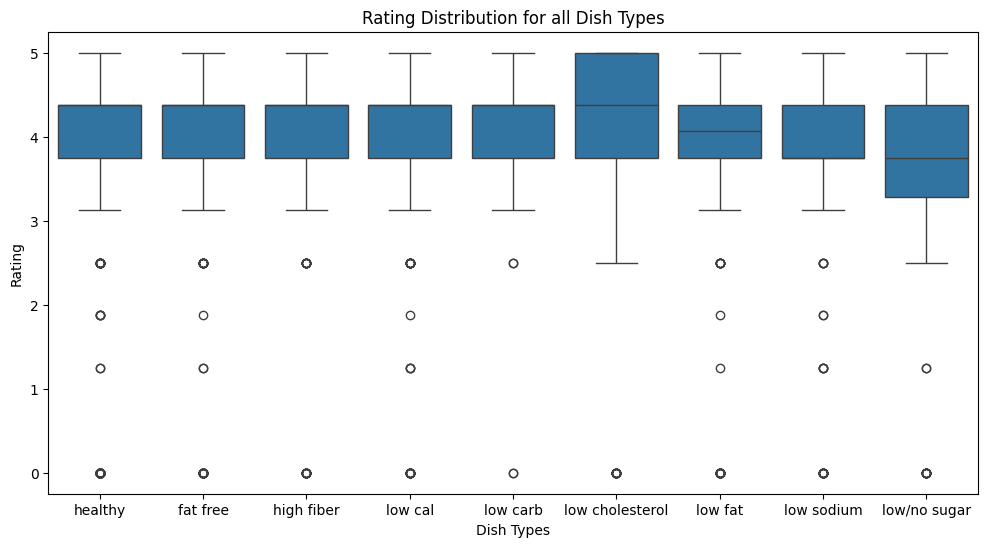

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='dishType', y='rating', data=dishtypes)
plt.title(f'Rating Distribution for all Dish Types')
plt.xlabel('Dish Types')
plt.ylabel('Rating')
plt.show()


Low colestorol = high rate
low sugar - low ratng

Lets find most common ingredients in dishes having highest rating.

In [20]:
df.loc[df['rating']==5,df.columns[8:]].sum().sort_values(ascending=False)[:50]

peanut free          680.0
bon appétit          666.0
soy free             663.0
vegetarian           569.0
tree nut free        544.0
kosher               539.0
pescatarian          539.0
gourmet              418.0
wheat/gluten-free    409.0
dessert              373.0
summer               329.0
quick & easy         283.0
bake                 263.0
kidney friendly      256.0
dairy free           251.0
side                 196.0
milk/cream           193.0
no sugar added       192.0
winter               184.0
drink                182.0
dinner               176.0
vegan                167.0
kid-friendly         166.0
fall                 166.0
sugar conscious      165.0
fruit                165.0
alcoholic            145.0
thanksgiving         135.0
healthy              131.0
egg                  128.0
sauce                127.0
onion                126.0
dairy                123.0
cocktail party       122.0
christmas            112.0
chill                107.0
tomato               106.0
b

Most common ingredients in recipies having very high rating of 5 are -

1.   Milk/Cream
2.   Fruit (Orange)
3.   Egg
4.   Sauce
5.   Vegetables (Onion, Tomato, Lemon, Garlic)


Now we will plot wordcloud of all titles having rating of 5 and see what is highlighted in that.




In [21]:
from wordcloud import WordCloud

In [22]:
toprecipies = ' '.join(list(df.loc[df['rating']==5,'title']))

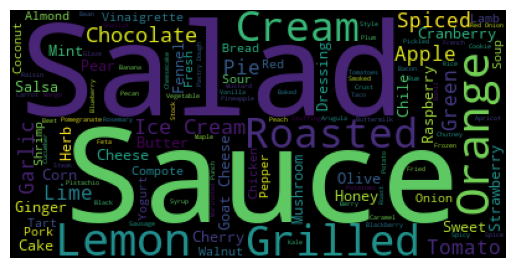

In [23]:
wc = WordCloud().generate(toprecipies)
plt.axis("off")
plt.imshow(wc)

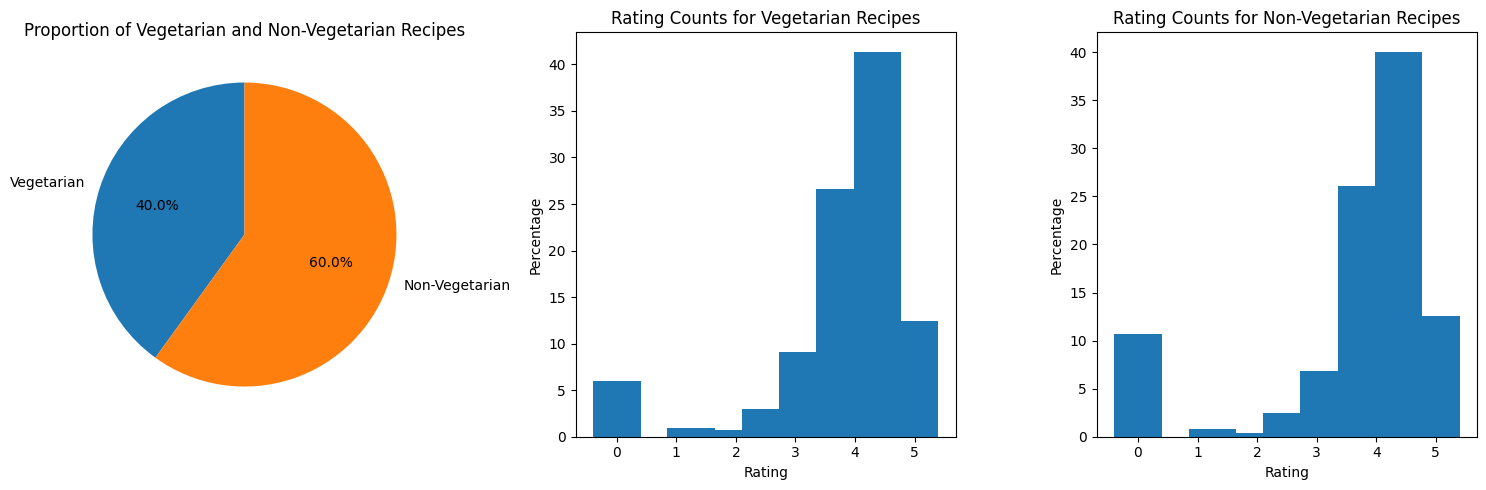

In [26]:
veg_count = df['vegetarian'].sum()
non_veg_count = len(df) - veg_count

# Create a pie chart
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie([veg_count, non_veg_count], labels=['Vegetarian', 'Non-Vegetarian'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Vegetarian and Non-Vegetarian Recipes')

# Create bar charts for rating counts
rating_counts_veg = df[df['vegetarian'] == 1]['rating'].value_counts(normalize=True).sort_index() * 100
rating_counts_non_veg = df[df['vegetarian'] == 0]['rating'].value_counts(normalize=True).sort_index() * 100

plt.subplot(1, 3, 2)
plt.bar(rating_counts_veg.index, rating_counts_veg.values)
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Rating Counts for Vegetarian Recipes')

plt.subplot(1, 3, 3)
plt.bar(rating_counts_non_veg.index, rating_counts_non_veg.values)
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Rating Counts for Non-Vegetarian Recipes')

plt.tight_layout()
plt.show()

There are higher non-vegeratian(60%) recipies as compared to vegetarian ones. Also one small difference we have noticed while analysing the individual ratings for veg and non-veg recipies. In case of non-veg recipies there are 10% recipies which got very low rating (~0) as compared to 5% for veg recipies.

Now we look into ocasion specific racipies data.

In [27]:
ocassions = ["anniversary","birthday","christmas","diwali","easter","halloween","new year's eve","thanksgiving",
"valentine's day"]

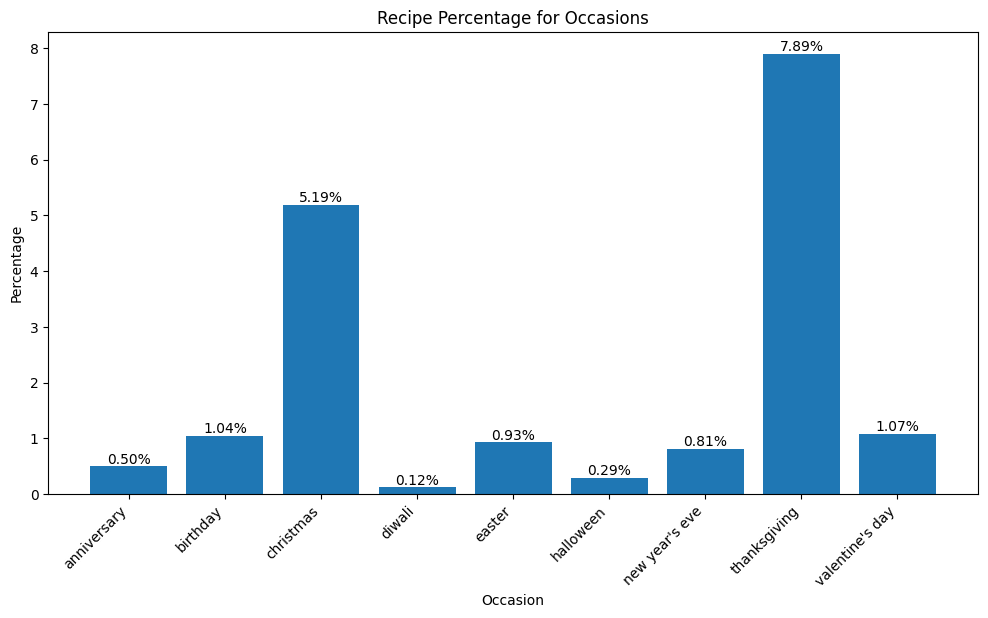

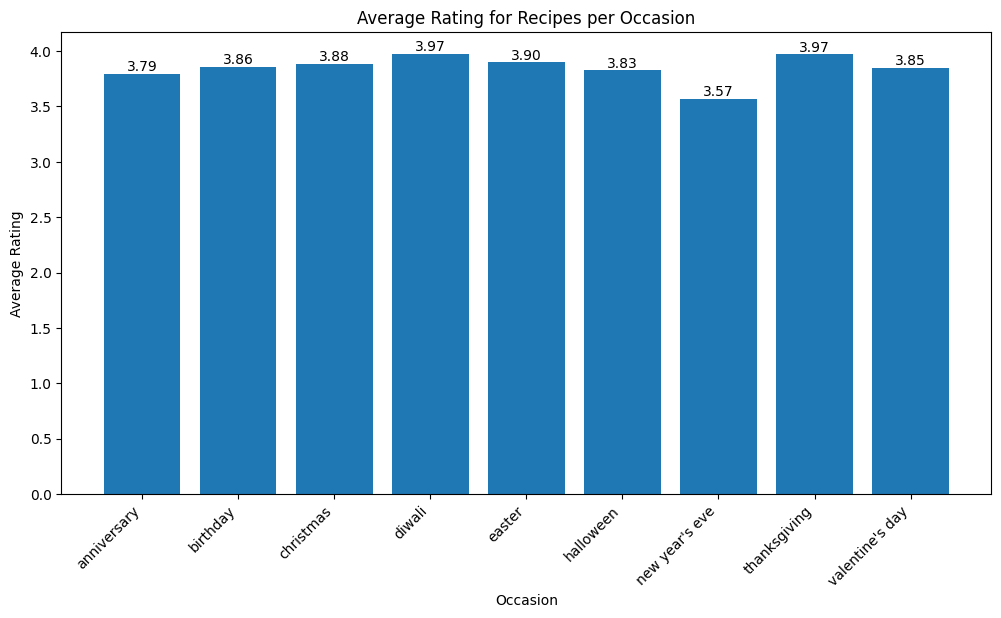

In [28]:
oc_counts = {}
oc_ratings = {}
for oc in ocassions:
  oc_counts[oc] = len(df[df[oc] == 1])*100/len(df)
  oc_ratings[oc] = df[df[oc] == 1]['rating'].mean()

# Bar chart for recipe percentage
plt.figure(figsize=(12, 6))
ax = plt.bar(oc_counts.keys(), oc_counts.values())
plt.title('Recipe Percentage for Occasions')
plt.xlabel('Occasion')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for bar in ax:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Bar graph for average rating
plt.figure(figsize=(12, 6))
ax = plt.bar(oc_ratings.keys(), oc_ratings.values())
plt.xlabel('Occasion')
plt.ylabel('Average Rating')
plt.title('Average Rating for Recipes per Occasion')
plt.xticks(rotation=45, ha='right')

# Adding value labels on the bars
for bar in ax:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


In [29]:
# Top 20 columns which has highest average rating, (columns having sum less than 50)

df_columns_rating = df.loc[:, df.columns[8:]].copy()
column_avg_ratings = {}
for column in df_columns_rating.columns:
  if df_columns_rating[column].sum() >= 50:
    column_avg_ratings[column] = df.loc[df[column] == 1, 'rating'].mean()

sorted_avg_ratings = dict(sorted(column_avg_ratings.items(), key=lambda item: item[1], reverse=True))

top20 = pd.DataFrame(list(sorted_avg_ratings.items()),columns=['metadata', 'avg rating'])[:20]
top20

,metadata,avg rating
0,stuffing/dressing,4.218750
1,prosciutto,4.209559
2,pork tenderloin,4.193182
3,low carb,4.183239
4,goat cheese,4.179878
5,scallop,4.149096
6,meat,4.121287
7,father's day,4.097222
8,poach,4.091797
9,steak,4.084596


In [30]:
pd.DataFrame(list(sorted_avg_ratings.items()),columns=['metadata', 'avg rating'])[-20:]

,metadata,avg rating
281,champagne,3.230634
282,green onion/scallion,3.212719
283,tree nut,3.163462
284,lemon juice,3.109177
285,chile pepper,3.063725
286,cocktail party,3.030278
287,liqueur,3.013699
288,brandy,2.936126
289,rum,2.901786
290,tea,2.841667


## Based on the analysis conducted, here are some insights on what contributes to higher recipe ratings:

# 1. Ingredients:
- Recipes containing ingredients like milk/cream, fruits (especially oranges), eggs, and sauces tend to receive higher ratings.
- Vegetables like onions, tomatoes, lemons, and garlic also seem to contribute positively.
- Recipes with alcoholic beverages and drinks have a higher chance of getting lower ratings.

# 2. Dish Type:
- Recipes classified as "low cholesterol" are more likely to receive higher ratings.
- "Low sugar" or "low/no sugar" recipes tend to have lower ratings.

# 3. Vegetarian vs. Non-Vegetarian:
- Non-vegetarian recipes are slightly more common than vegetarian ones in the dataset.
- Non-vegetarian recipes have a slightly higher chance of getting extremely low ratings.

# 4. Occasion:
- Recipes for certain occasions, like Christmas and Thanksgiving, have a larger recipe count as well as higher average ratings.


In summary, recipes with a focus on ingredients like milk/cream, fruits, eggs, and vegetables, 
especially those classified as "low cholesterol," are likely to receive higher ratings.
Additionally, recipes designed for specific occasions like Christmas and Thanksgiving often get high ratings.
